<a href="https://colab.research.google.com/github/EduardoAve/potencial-gravitatorio-luna/blob/main/LunaDensidadUniforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dolfin import *
import mshr
#from mshr import *    #no entiendo por que a veces me da error utilizando import mshr
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

radius = 1737.1  # Radio lunar en kilometros
G = 6.67430e-11  # Constante de gravitacion universal en m^3 kg^(-1) s^(-2)
rho_lunar = 3344  # Densidad de la luna en kg/m^3

# Crear la malla esferica
domain = Sphere(Point(0, 0, 0), radius)
mesh = dolfin.Mesh(mshr.generate_mesh(domain, 50))

V = FunctionSpace(mesh, 'P', 1)

# Condicion de dirichlet
phi_surface = Constant(-2.82e6)  # Pontecial gravitatorio en la superficie lunar

class SurfaceBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

boundary = SurfaceBoundary()

bc = DirichletBC(V, phi_surface, boundary)

Generating mesh with CGAL 3D mesh generator


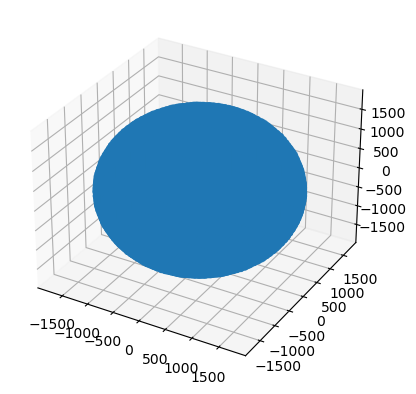

In [ ]:
#imprimir la malla

fig = plt.figure()
ax = plt.axes(projection='3d')
mesh_coordinates = mesh.coordinates()
ax.scatter3D(mesh_coordinates[:, 0], mesh_coordinates[:, 1], mesh_coordinates[:, 2])
plt.show()

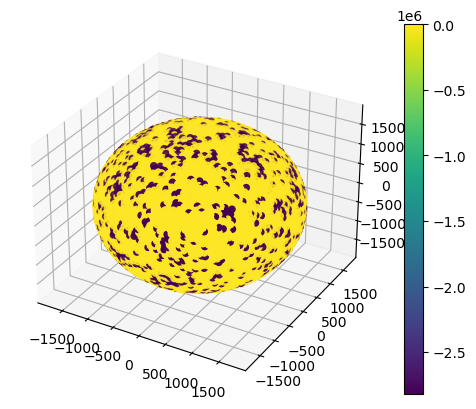

In [ ]:
#imprimir la condición inicial

phi_boundary = Function(V)
bc.apply(phi_boundary.vector())

fig = plt.figure()
ax = plt.axes(projection='3d')
mesh_coordinates = mesh.coordinates()
phi_boundary_values = phi_boundary.vector().get_local()  # Get the boundary condition values as a numpy array
ax.scatter3D(mesh_coordinates[:, 0], mesh_coordinates[:, 1], mesh_coordinates[:, 2], c=phi_boundary_values, cmap='viridis')
plt.colorbar(ax.scatter3D(mesh_coordinates[:, 0], mesh_coordinates[:, 1], mesh_coordinates[:, 2], c=phi_boundary_values, cmap='viridis'))
plt.show()

In [ ]:
phi = TrialFunction(V)
v = TestFunction(V)
rho = Constant(rho_lunar)  # densidad uniforme de la luna

a = -inner(grad(phi), grad(v)) * dx
L = 4 * pi * G * rho * v * dx

# Solve the variational problem
phi_sol = Function(V)
solve(a == L, phi_sol, bc)

file = File("densidad_uniforme.pvd")
file << phi_sol


Solving linear variational problem.
